In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [3]:
%cd /content/drive/MyDrive/kaggle/

/content/drive/MyDrive/kaggle


In [4]:
!kaggle datasets download -d imbikramsaha/food11 --unzip


 99% 516M/519M [00:14<00:00, 37.3MB/s]
100% 519M/519M [00:14<00:00, 37.8MB/s]


In [39]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [41]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_datagen.flow_from_directory(
                                '/content/drive/MyDrive/kaggle/food11/train',
                                target_size=(150, 150),
                                batch_size=20,
                                class_mode='categorical')

Found 9900 images belonging to 11 classes.


In [45]:
test_generator = test_datagen.flow_from_directory(
                                '/content/drive/MyDrive/kaggle/food11/test',
                                target_size=(150, 150),
                                batch_size=20,
                                class_mode='categorical')

Found 1100 images belonging to 11 classes.


In [46]:
history = model.fit_generator(  train_generator,
                                steps_per_epoch=10,
                                epochs=30,
                                )


Epoch 1/30


<ipython-input-46-4951c17b68c4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(  train_generator,


10/10 [==============================] - 13s 1s/step - loss: 2.4748 - acc: 0.0900
Epoch 2/30
10/10 [==============================] - 10s 908ms/step - loss: 2.3958 - acc: 0.0850
Epoch 3/30
10/10 [==============================] - 12s 1s/step - loss: 2.3837 - acc: 0.1300
Epoch 4/30
10/10 [==============================] - 12s 1s/step - loss: 2.3938 - acc: 0.0600
Epoch 5/30
10/10 [==============================] - 9s 924ms/step - loss: 2.3918 - acc: 0.1200
Epoch 6/30
10/10 [==============================] - 11s 989ms/step - loss: 2.3858 - acc: 0.1350
Epoch 7/30
10/10 [==============================] - 12s 1s/step - loss: 2.3478 - acc: 0.1250
Epoch 8/30
10/10 [==============================] - 12s 1s/step - loss: 2.3535 - acc: 0.1300
Epoch 9/30
10/10 [==============================] - 11s 1s/step - loss: 2.3001 - acc: 0.1650
Epoch 10/30
10/10 [==============================] - 12s 1s/step - loss: 2.3368 - acc: 0.1150
Epoch 11/30
10/10 [==============================] - 11s 976ms/step - lo

In [47]:
y_test = model.evaluate(test_generator)

55/55 [==============================] - 18s 331ms/step - loss: 2.2196 - acc: 0.1945


In [48]:
y_pred=model.predict(test_generator)

55/55 [==============================] - 19s 334ms/step


In [49]:
y_pred

array([[0.0522987 , 0.16871281, 0.03781252, ..., 0.02490049, 0.07963995,
        0.16672723],
       [0.11681759, 0.06000496, 0.09944329, ..., 0.11507086, 0.06031372,
        0.04362621],
       [0.12399451, 0.06857459, 0.07664493, ..., 0.09688164, 0.06320811,
        0.05780069],
       ...,
       [0.09073833, 0.06799158, 0.06501636, ..., 0.0792041 , 0.08722492,
        0.0791221 ],
       [0.12011901, 0.01463434, 0.29290324, ..., 0.06904518, 0.10281953,
        0.04084126],
       [0.02424019, 0.68436116, 0.02095145, ..., 0.02226127, 0.05079771,
        0.04569154]], dtype=float32)

In [50]:
len(y_pred)

1100

In [52]:
import numpy as np

Y_pred=np.argmax(y_pred,axis=1)

In [53]:
Y_pred


array([7, 6, 6, ..., 6, 2, 1])

In [54]:
len(Y_pred)

1100

Classification Report
               precision    recall  f1-score   support

    apple_pie       0.12      0.02      0.03       100
   cheesecake       0.11      0.14      0.13       100
chicken_curry       0.07      0.17      0.10       100
 french_fries       0.09      0.03      0.04       100
   fried_rice       0.33      0.03      0.06       100
    hamburger       0.19      0.11      0.14       100
      hot_dog       0.09      0.16      0.11       100
    ice_cream       0.07      0.20      0.10       100
     omelette       0.13      0.12      0.12       100
        pizza       0.10      0.04      0.06       100
        sushi       0.12      0.02      0.03       100

     accuracy                           0.09      1100
    macro avg       0.13      0.09      0.08      1100
 weighted avg       0.13      0.09      0.08      1100

Confusion Matrix


<Axes: >

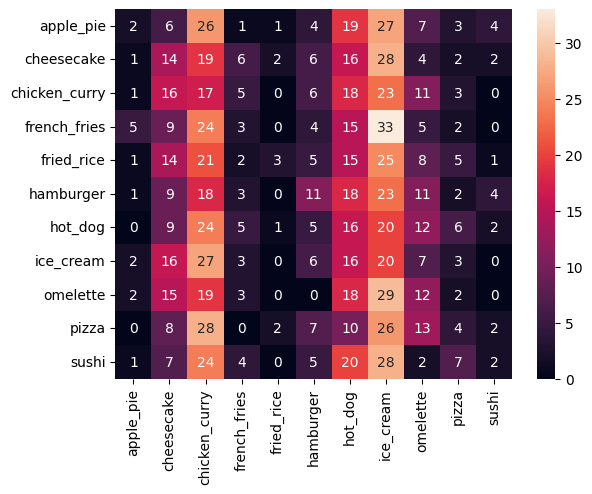

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, Y_pred, target_names=target_names))
print('Confusion Matrix')
conf_mat = confusion_matrix(test_generator.classes, Y_pred)
df_cm = pd.DataFrame(conf_mat, index = target_names, columns = target_names)
sn.heatmap(df_cm, annot=True)